## Explore Data

In [ ]:
!pip install kaggle
! mkdir ~/.kaggle
! cp /content/kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d khoongweihao/covid19-xray-dataset-train-test-sets
!unzip -q /content/covid19-xray-dataset-train-test-sets.zip


#! kaggle competitions download -c 'name-of-competition'
#!kaggle datasets download -d marcoferoldi/chest-xray-small

#!kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images
#!kaggle datasets download -d jbeltranleon/xrayschest-224sla


#!kaggle datasets download -d nabeelsajid917/covid-19-x-ray-10000-images
#!kaggle datasets download -d masumrefat/chest-xray-images-pneumonia-and-covid19

#! unzip /content/alzheimers-dataset-4-class-of-images.zip
#!kaggle datasets download -d salader/dogs-vs-cats
#!unzip /content/dogs-vs-cats.zip
#!unzip /content/xrayschest-224sla.zip
#!unzip chest-xray-images-pneumonia-and-covid19
#!unzip covid-19-x-ray-10000-images

!kaggle datasets download -d theroyakash/covid19
!unzip -q /content/covid19.zip
#!kaggle datasets download -d tawsifurrahman/covid19-radiography-database
#!unzip /content/covid19-radiography-database


 96% 81.0M/84.3M [00:04<00:00, 14.1MB/s]
100% 84.3M/84.3M [00:04<00:00, 18.3MB/s]
 96% 123M/128M [00:04<00:00, 35.0MB/s]
100% 128M/128M [00:04<00:00, 30.8MB/s]


In [ ]:
#ImaeNEt of Medicine
!kaggle datasets download -d raddar/tuberculosis-chest-xrays-shenzhen
!unzip -q '/content/tuberculosis-chest-xrays-shenzhen.zip'

100% 3.51G/3.51G [00:42<00:00, 51.9MB/s]
100% 3.51G/3.51G [00:42<00:00, 87.9MB/s]


# Dog and cat Kaggle dataset

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

In [ ]:
import os
import zipfile
'''
local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()'''

"\nlocal_zip = '/tmp/cats_and_dogs_filtered.zip'\n\nzip_ref = zipfile.ZipFile(local_zip, 'r')\n\nzip_ref.extractall('/tmp')\nzip_ref.close()"

In [ ]:
base_dir = '/content/xray_dataset_covid19'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

# Directory with our training cat/pneumonia pictures
train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')

# Directory with our validation cat/pneumonia pictures
validation_normal_dir = os.path.join(validation_dir, 'NORMAL')
validation_pneumonia_dir = os.path.join(validation_dir, 'PNEUMONIA')


In [ ]:
train_normal_fnames = os.listdir( train_normal_dir )
train_pneumonia_fnames = os.listdir( train_pneumonia_dir )

print(train_normal_fnames[:10])
print(train_pneumonia_fnames[:10])

['IM-0016-0001.jpeg', 'IM-0046-0001.jpeg', 'IM-0039-0001.jpeg', 'IM-0027-0001.jpeg', 'IM-0077-0001.jpeg', 'IM-0083-0001.jpeg', 'IM-0081-0001.jpeg', 'IM-0033-0001.jpeg', 'IM-0045-0001.jpeg', 'IM-0085-0001.jpeg']
['E1724330-1866-4581-8CD8-CEC9B8AFEDDE.jpeg', '9C34AF49-E589-44D5-92D3-168B3B04E4A6.jpeg', '1-s2.0-S1684118220300608-main.pdf-001.jpg', '5931B64A-7B97-485D-BE60-3F1EA76BC4F0.jpeg', 'covid-19-pneumonia-7-PA.jpg', '85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg', 'lancet-case2a.jpg', 'jkms-35-e79-g001-l-c.jpg', '7AF6C1AF-D249-4BD2-8C26-449304105D03.jpeg', 'nejmoa2001191_f5-PA.jpeg']


In [ ]:
print('total training normal images :', len(os.listdir(      train_normal_dir ) ))
print('total training pneumonia images :', len(os.listdir(      train_pneumonia_dir ) ))

print('total validation normal images :', len(os.listdir( validation_normal_dir ) ))
print('total validation pneumonia images :', len(os.listdir( validation_pneumonia_dir ) ))

total training normal images : 74
total training pneumonia images : 74
total validation normal images : 20
total validation pneumonia images : 20


#Looking into data

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

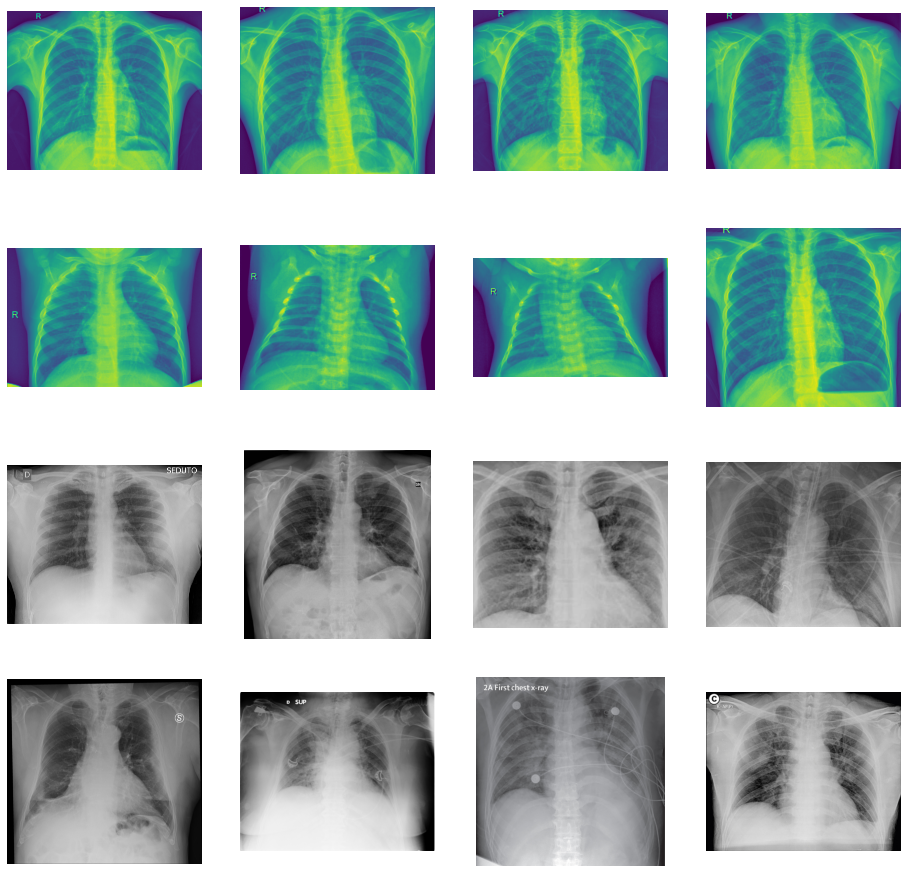

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_normal_pix = [os.path.join(train_normal_dir, fname) 
                for fname in train_normal_fnames[ pic_index-8:pic_index] 
               ]

next_pneumonia_pix = [os.path.join(train_pneumonia_dir, fname) 
                for fname in train_pneumonia_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_normal_pix+next_pneumonia_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


#Training model

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    #tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('normal') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 18496)           

##  CBR model

https://colab.research.google.com/drive/1HjqJ5NyomFyOfdA-HsWkPfp5Wzw7oC9-#scrollTo=XZIYzOXUxv1A

The CBR family of small convolutional neural networks consists of multiple conv2d-batchnorm-relu
layers followed by a maxpool. Each maxpool has spatial window (3x3) and stride (2x2). For each
CBR architecture, there is one filter size for all the convolutions (which all have stride 1). Below,
conv-n denotes a 2d convolutionl with n output channels.

• CBR-LargeT(all) has 7x7 conv filters: (conv32-bn-relu) maxpool (conv64-bn-relu) maxpool
(conv128-bn-relu) maxpool (conv256-bn-relu) maxpool (conv512-bn-relu) global avgpool,
classification
• CBR-LargeW(ide) has 7x7 conv filters: (conv64-bn-relu) maxpool (conv128-bn-relu) max-
pool (conv256-bn-relu) maxpool (conv512-bn-relu) maxpool, global avgpool, classification.
• CBR-Small has 7x7 conv filters: (conv32-bn-relu) maxpool (conv64-bn-relu) maxpool
(conv128-bn-relu) maxpool (conv256-bn-relu) maxpool global avgpool, classification
• CBR-Tiny has 5x5 conv filters: (conv64-bn-relu) maxpool (conv128-bn-relu) maxpool
(conv256-bn-relu) maxpool (conv512-bn-relu) maxpool, global avgpool, classification.

The models on Retina are trained on 587 × 587 images, with learning rate 0.001 and a batch size of
8 (for memory considerations.) The Adam optimizer is used. The models on the chest x-ray are
trained on 224 × 224 images, with a batch size of 32, and vanilla SGD with momentum (coefficient
0.9). The learning rate scheduling is inherited from the ImageNet training pipeline, which warms
up from 0 to 0.1 × 256
 32 in 5 epochs, and then decay with a factor of 10 on epoch 30, 60, and 90,
respectively.

For dataset preprocessing we used mild random cropping, as well as standard normalization by
the mean and standard deviation for ImageNet. We augmented the data with hue and contrast
augmentations. For the Retina data, we used random horizontal and vertical flips, and for the chest
x-ray data, we did not do random flip. We did not do model specific hyperparameter tuning on each
target data, and used fixed standard hyperparameters.
For experiments on the Retina data, we trained the standard ImageNet models, Resnet50 and
Inception-v3, by replacing the final 1000 class ImageNet classification head with a five class head
for DR diagnosis, or five classes for the five different chest x-ray diseases. We use the sigmoid
activation at the top instead of the multiclass softmax activation, and the train the models in the
multi-label binary classification framework.

In [ ]:
def CBR(input_shape,classes,a,b,c,d,kernel_size): 
    Input = layers.Input(shape=input_shape)
    x = layers.Conv2D(filters=a,kernel_size=kernel_size,padding="same", activation="relu")(Input)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D(pool_size=(3,3),strides=(2,2))(x)
    x = layers.Conv2D(filters=b, kernel_size=kernel_size, padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D(pool_size=(3,3),strides=(2,2))(x)
    x = layers.Conv2D(filters=c, kernel_size=kernel_size, padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D(pool_size=(3,3),strides=(2,2))(x)
    x = layers.Conv2D(filters=d, kernel_size=kernel_size, padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D(pool_size=(3,3),strides=(2,2))(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(units= classes , activation="sigmoid")(x)

    model = Model(Input , x)
    model.summary()
    return model

def CBRlarge(input_shape,classes):
  return CBR(input_shape,classes,64,128,256,512,(7,7))

def CBRsmall(input_shape,classes):
  return CBR(input_shape,classes,32,64,128,256,(7,7))

def CBRtiny(input_shape,classes):
  return CBR(input_shape,classes,64,128,256,512,(5,5))




model = CBRtiny((64,64,3),3)

# Train

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=5,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=10,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              #steps_per_epoch=100,
                              epochs=10,  #validation_steps=50,
                              verbose=2)

Epoch 1/10
30/30 - 6s - loss: 0.6380 - accuracy: 0.6892 - val_loss: 0.5047 - val_accuracy: 0.9750
Epoch 2/10
30/30 - 6s - loss: 0.4941 - accuracy: 0.8311 - val_loss: 0.3571 - val_accuracy: 0.9500
Epoch 3/10
30/30 - 6s - loss: 0.3623 - accuracy: 0.8986 - val_loss: 0.1901 - val_accuracy: 1.0000
Epoch 4/10
30/30 - 6s - loss: 0.2745 - accuracy: 0.8986 - val_loss: 0.1213 - val_accuracy: 1.0000
Epoch 5/10
30/30 - 6s - loss: 0.2205 - accuracy: 0.9392 - val_loss: 0.0830 - val_accuracy: 1.0000
Epoch 6/10
30/30 - 6s - loss: 0.1775 - accuracy: 0.9527 - val_loss: 0.1656 - val_accuracy: 0.9500
Epoch 7/10
30/30 - 6s - loss: 0.1889 - accuracy: 0.9257 - val_loss: 0.0618 - val_accuracy: 1.0000
Epoch 8/10
30/30 - 6s - loss: 0.1428 - accuracy: 0.9459 - val_loss: 0.0648 - val_accuracy: 1.0000
Epoch 9/10
30/30 - 6s - loss: 0.1344 - accuracy: 0.9527 - val_loss: 0.0391 - val_accuracy: 1.0000
Epoch 10/10
30/30 - 6s - loss: 0.1373 - accuracy: 0.9595 - val_loss: 0.0439 - val_accuracy: 1.0000


# Testing on exteral image

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a pneumonia or a cat.

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a pneumonia")
    
  else:
    print(fn + " is a normal")
 

#Visualizing Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random normal or pneumonia image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


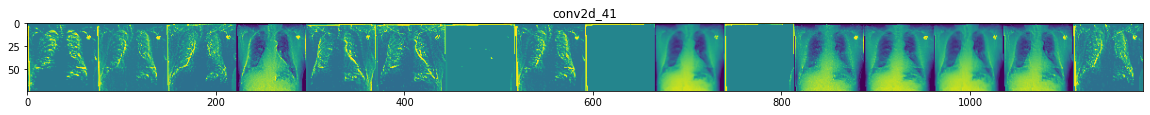

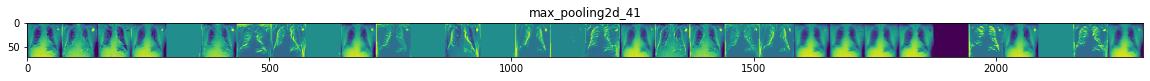

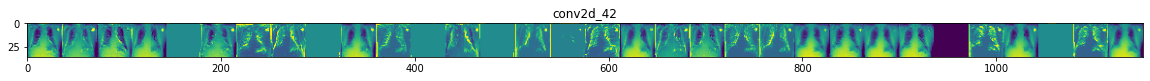

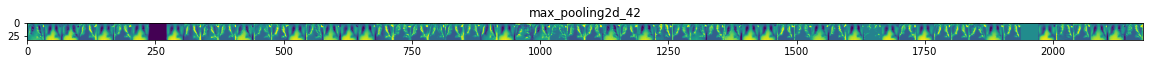

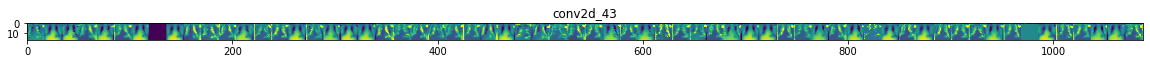

In [ ]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a normal or pneumonia from the training set.
normal_img_files = [os.path.join(train_normal_dir, f) for f in train_normal_fnames]+
pneumonia_img_files = [os.path.join(train_pneumonia_dir, f) for f in train_pneumonia_fnames]

img_path = random.choice(normal_img_files + pneumonia_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

### Evaluating Accuracy and Loss for the Model

Let's plot the training/validation accuracy and loss as collected during training:

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )